<a href="https://colab.research.google.com/github/tienvtt/Stock-Analysis-and-Prediction-Applying-Machine-Learning/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives**:
- Use mathematical and statistical techniques and to analyze patterns, trends
- Utilize machine learning algorithm to predict stock price.
- Compare stocks belonged to Financial Services: SSI, VND, VCI, VIX, HCM for data-driven decisions.

# **Install library and load data**

In [41]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

fatal: destination path 'vnquant' already exists and is not an empty directory.
/content/vnquant/vnquant
python3: can't open file '/content/vnquant/vnquant/setup.py': [Errno 2] No such file or directory


In [42]:
import pandas as pd
import vnquant.data as vnq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Define stock symbols
symbols = ["SHB", "VHM", "FPT", "HPG","HCM"]

# Store DataFrames for each stock
stock_data = {}

for symbol in symbols:
    loader = vnq.DataLoader(
        symbols=symbol,
        start="2023-01-01",
        end="2025-03-21",
        minimal=True,
        data_source="cafe"
    )

    # Download and store DataFrame
    df = pd.DataFrame(loader.download())

    df.columns = df.columns.droplevel(level=1)

    stock_data[symbol] = df

    # Print first few rows for verification
    print(f"Data for {symbol}:")
    print(df.head(), "\n")


# Assign DataFrames to individual variables
df_shb = stock_data["SHB"]
df_vhm = stock_data["VHM"]
df_fpt = stock_data["FPT"]
df_hpg = stock_data["HPG"]
df_hcm = stock_data["HCM"]

[2025-03-25 17:21:52] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['SHB'] from CAFEF, start: 01/01/2023, end: 21/03/2025!
[2025-03-25 17:21:54] - Assitant - INFO      - download_one - line 94 - data SHB from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-25 17:21:54] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['VHM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for SHB:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  SHB  12.05  11.65  11.85  11.75   11.75    74606600.0   
2025-03-20  SHB  11.90  11.50  11.65  11.75   11.75    79891400.0   
2025-03-19  SHB  11.80  11.40  11.50  11.65   11.65    68781700.0   
2025-03-18  SHB  11.70  11.10  11.25  11.60   11.60    71982900.0   
2025-03-17  SHB  11.40  10.90  10.95  11.25   11.25    94585500.0   

Attributes   value_match  
date                      
2025-03-21  8.834230e+11  
2025-03-20  9.347830e+11  
2025-03-19  8.011410e+11  
2025-03-18  8.175310e+11  
2025-03-17  1.066489e+12   



[2025-03-25 17:21:56] - Assitant - INFO      - download_one - line 94 - data VHM from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-25 17:21:56] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['FPT'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for VHM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  VHM  48.40  47.10  47.10  48.25   48.25    13695700.0   
2025-03-20  VHM  48.20  46.95  47.35  47.35   47.35    13458400.0   
2025-03-19  VHM  47.90  46.25  46.80  47.35   47.35    13442500.0   
2025-03-18  VHM  48.75  46.80  47.60  47.30   47.30    12239500.0   
2025-03-17  VHM  48.00  46.80  47.95  47.80   47.80    11017800.0   

Attributes   value_match  
date                      
2025-03-21  6.590010e+11  
2025-03-20  6.384460e+11  
2025-03-19  6.318710e+11  
2025-03-18  5.820090e+11  
2025-03-17  5.240910e+11   



[2025-03-25 17:21:59] - Assitant - INFO      - download_one - line 94 - data FPT from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-25 17:21:59] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HPG'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for FPT:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  FPT  129.0  125.0  125.0  128.0   128.0     6424800.0   
2025-03-20  FPT  126.8  124.5  124.6  125.0   125.0     8203400.0   
2025-03-19  FPT  130.6  123.5  130.1  124.6   124.6    18128400.0   
2025-03-18  FPT  132.2  130.0  130.1  130.0   130.0     5508500.0   
2025-03-17  FPT  132.1  129.6  131.6  130.0   130.0     6707000.0   

Attributes   value_match  
date                      
2025-03-21  8.202040e+11  
2025-03-20  1.027201e+12  
2025-03-19  2.288715e+12  
2025-03-18  7.197290e+11  
2025-03-17  8.748980e+11   



[2025-03-25 17:22:01] - Assitant - INFO      - download_one - line 94 - data HPG from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-25 17:22:01] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HCM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for HPG:
Attributes code   high    low  open  close  adjust  volume_match   value_match
date                                                                          
2025-03-21  HPG  27.25  27.05  27.1  27.15   27.15    18912200.0  5.135380e+11
2025-03-20  HPG  27.45  27.05  27.3  27.15   27.15    25022500.0  6.794540e+11
2025-03-19  HPG  27.60  27.10  27.6  27.25   27.25    37925600.0  1.036355e+12
2025-03-18  HPG  28.05  27.60  27.9  27.60   27.60    18741700.0  5.209910e+11
2025-03-17  HPG  28.15  27.75  27.9  27.85   27.85    19719700.0  5.514120e+11 



[2025-03-25 17:22:03] - Assitant - INFO      - download_one - line 94 - data HCM from 2023-01-01 to 2025-03-21 have already cloned!


Data for HCM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  HCM  32.15  31.85  32.00  31.85   31.85     7561400.0   
2025-03-20  HCM  32.45  31.70  32.00  32.05   32.05     7952100.0   
2025-03-19  HCM  32.00  31.35  31.65  31.95   31.95    10722700.0   
2025-03-18  HCM  32.40  31.75  32.35  31.75   31.75     8207900.0   
2025-03-17  HCM  32.30  31.80  32.00  32.30   32.30     5418900.0   

Attributes   value_match  
date                      
2025-03-21  2.416840e+11  
2025-03-20  2.546920e+11  
2025-03-19  3.398620e+11  
2025-03-18  2.629520e+11  
2025-03-17  1.735320e+11   



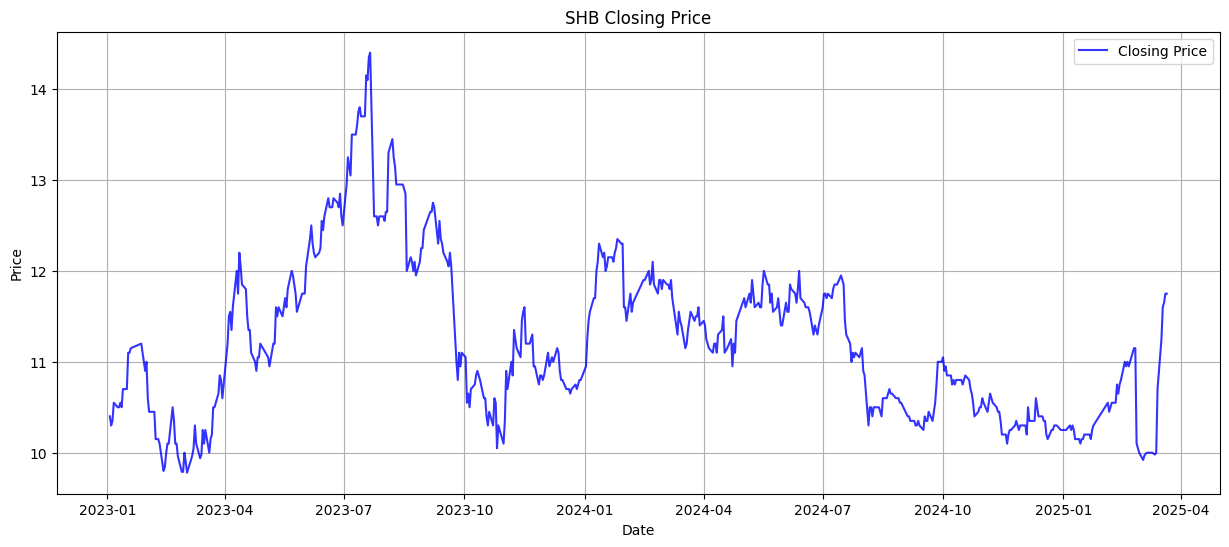

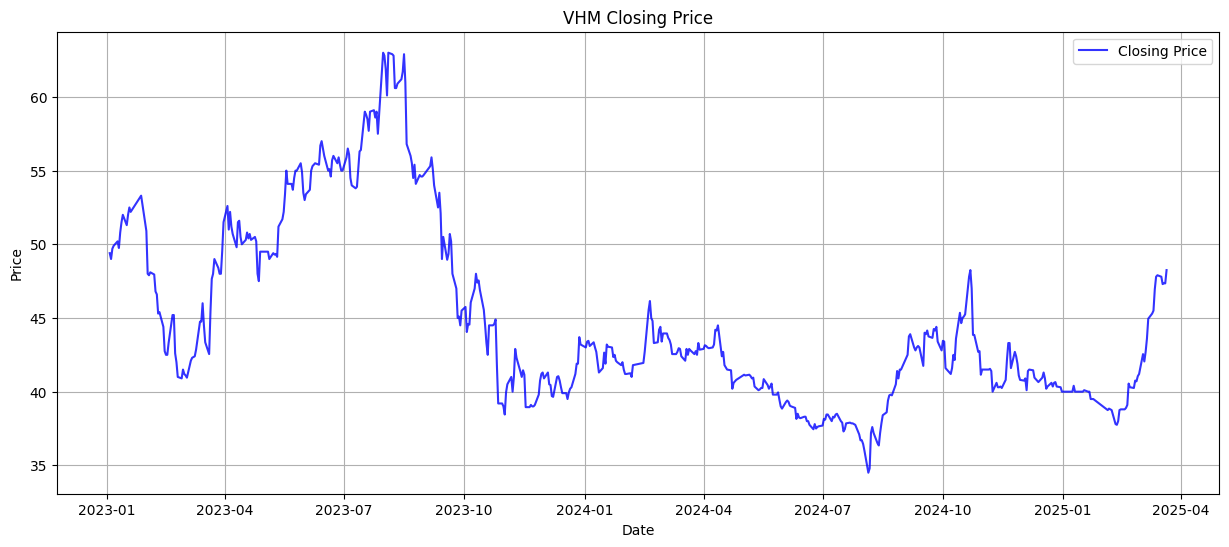

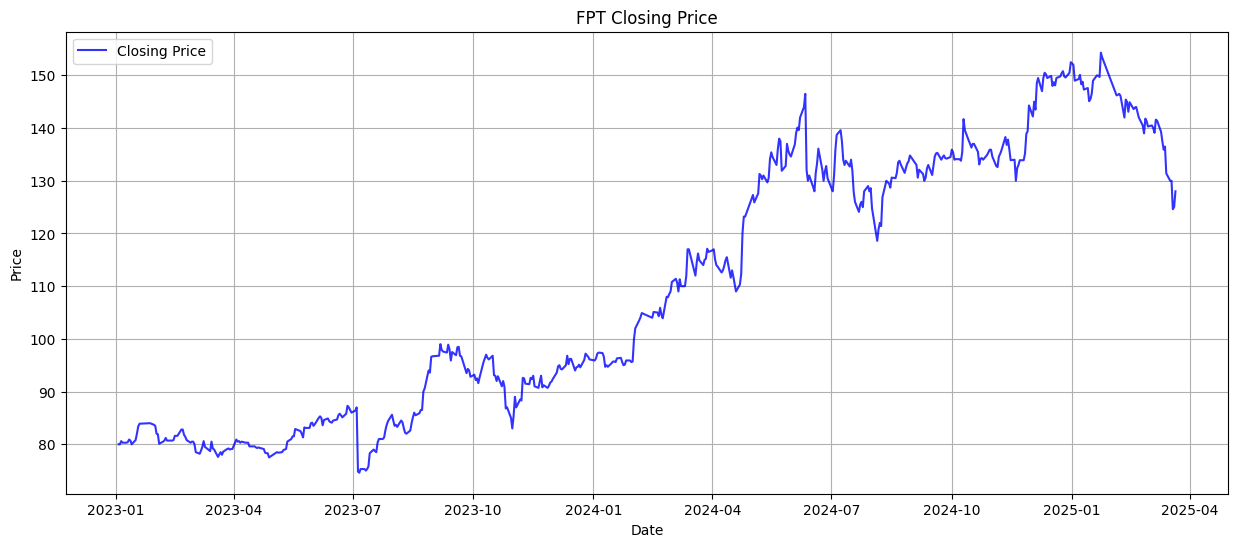

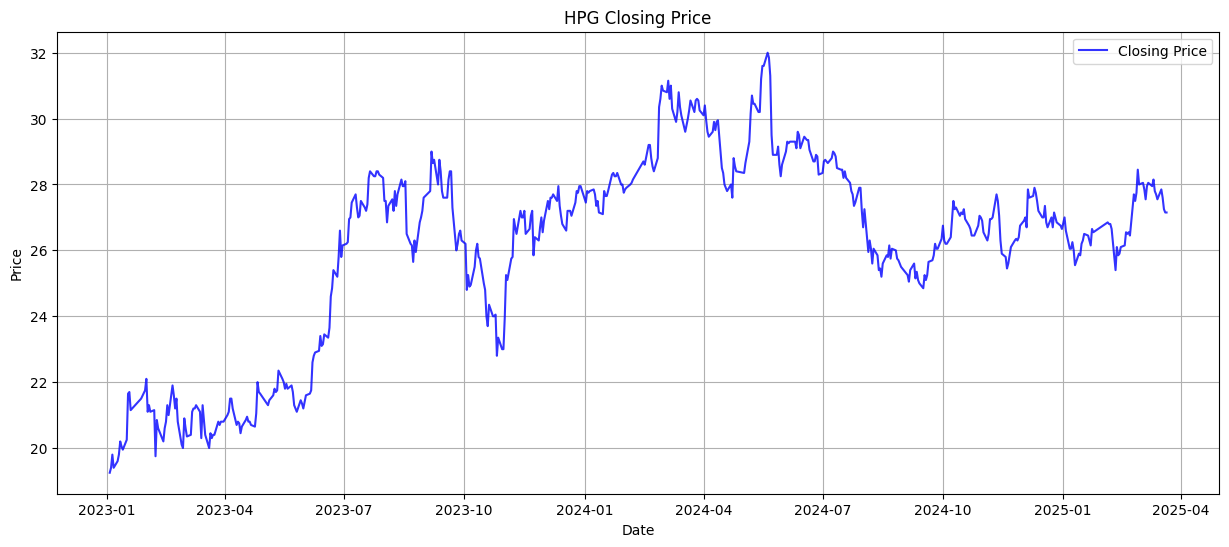

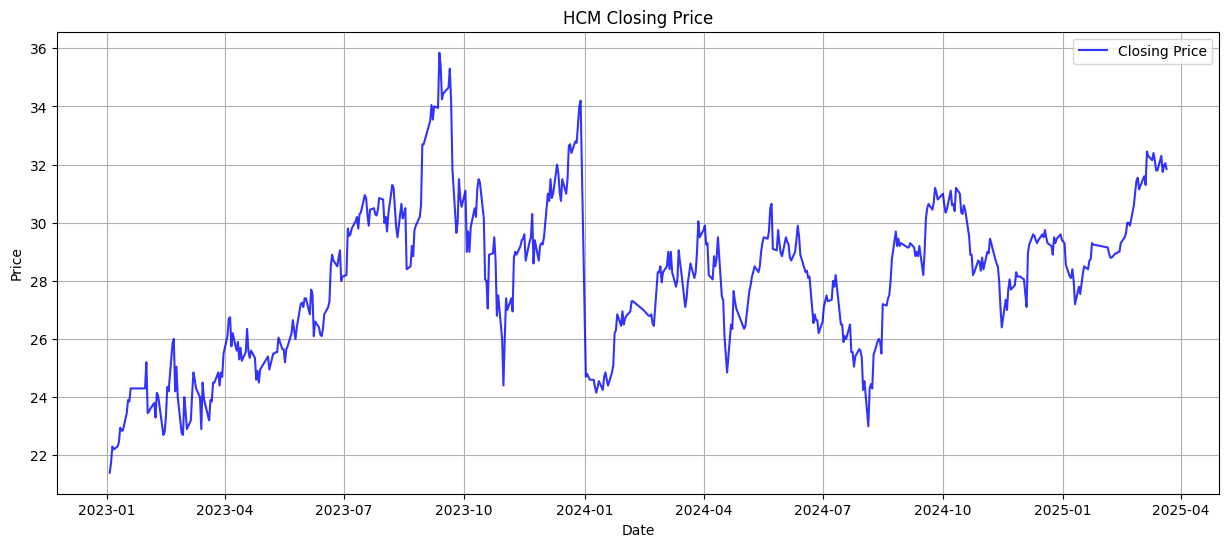

In [44]:
def plot_price_trend(df, symbol):
    """Plot Closing Price & SMA from a given start date."""
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df["close"], label="Closing Price", color="blue", alpha=0.8)
    plt.title(f"{symbol} Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()
plot_price_trend(df_shb,"SHB")
plot_price_trend(df_vhm,"VHM")
plot_price_trend(df_fpt,"FPT")
plot_price_trend(df_hpg,"HPG")
plot_price_trend(df_hcm,"HCM")


In [45]:
def stock_info(df):
  print (df.info())
  print (df.isnull().sum())

stock_info(df_shb)
stock_info(df_vhm)
stock_info(df_fpt)
stock_info(df_hpg)
stock_info(df_hcm)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2025-03-21 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          550 non-null    object 
 1   high          550 non-null    float64
 2   low           550 non-null    float64
 3   open          550 non-null    float64
 4   close         550 non-null    float64
 5   adjust        550 non-null    float64
 6   volume_match  550 non-null    float64
 7   value_match   550 non-null    float64
dtypes: float64(7), object(1)
memory usage: 38.7+ KB
None
Attributes
code            0
high            0
low             0
open            0
close           0
adjust          0
volume_match    0
value_match     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2025-03-21 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code   

# **PREPARE FOR TRAINING LSTM MODEL**





In [46]:
df_shb = df_shb.sort_index()
df_vhm = df_vhm.sort_index()
df_fpt = df_fpt.sort_index()
df_hpg = df_hpg.sort_index()
df_hcm = df_hcm.sort_index()

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
def prepare_data(df, feature_col='close', seq_length=10):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(df[[feature_col]].values)

    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    X, y = np.array(X), np.array(y)
    train_size = int(len(X) * 0.8)

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32), \
           torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32), scaler

In [49]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])



In [50]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=50):
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


In [51]:
def evaluate_model(model, X_test, y_test, scaler):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).numpy()
    y_pred = scaler.inverse_transform(y_pred)
    y_actual = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_actual, y_pred)

    print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2-Score: {r2:.4f}')
    return y_pred


In [52]:
def plot_results(df, y_pred, feature_col='close'):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index[-len(y_pred):], df[feature_col].values[-len(y_pred):], label='Actual')
    plt.plot(df.index[-len(y_pred):], y_pred, label='Predicted', linestyle='dashed')
    plt.legend()
    plt.show()

In [53]:
# def predict_future(model, df, scaler, seq_length=10, days=7):
#     model.eval()
#     last_sequence = scaler.transform(df[['close']].values[-seq_length:].reshape(-1, 1))
#     last_sequence = torch.tensor(last_sequence, dtype=torch.float32).unsqueeze(0)

#     predictions = []
#     with torch.no_grad():
#         for _ in range(days):
#             pred = model(last_sequence).numpy()
#             predictions.append(pred[0][0])
#             last_sequence = torch.cat((last_sequence[:, 1:, :], torch.tensor(pred).unsqueeze(0)), dim=1)

#     predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
#     future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=days)

#     plt.figure(figsize=(10, 5))
#     plt.plot(df.index, df['close'], label='Actual')
#     plt.plot(future_dates, predictions, label='Predicted Future', linestyle='dashed', color='red')
#     plt.legend()
#     plt.show()

#     return future_dates, predictions

In [54]:
def predict_future(model, df, scaler, seq_length=10, days=7):
    model.eval()
    last_sequence = scaler.transform(df[['close']].values[-seq_length:].reshape(-1, 1))
    last_sequence = torch.tensor(last_sequence, dtype=torch.float32).unsqueeze(0)

    predictions = []
    with torch.no_grad():
        for _ in range(days):
            pred = model(last_sequence).numpy()
            predictions.append(pred[0][0])
            last_sequence = torch.cat((last_sequence[:, 1:, :], torch.tensor(pred).unsqueeze(0)), dim=1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=days)

    for date, value in zip(future_dates, predictions.flatten()):
        print(f"{date.date()}: {value:.4f}")

    return future_dates, predictions

In [55]:
# def process_stock(df, hidden_size=50, num_layers=2, lr=0.001, batch_size=16, num_epochs=50):
#     X_train, y_train, X_test, y_test, scaler = prepare_data(df)
#     train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

#     model = LSTMModel(hidden_size=hidden_size, num_layers=num_layers)
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(model.parameters(), lr=lr)

#     train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)
#     y_pred = evaluate_model(model, X_test, y_test, scaler)
#     plot_results(df, y_pred)

In [56]:
def process_stock(df, hidden_size=50, num_layers=2, lr=0.001, batch_size=16, num_epochs=50):
    X_train, y_train, X_test, y_test, scaler = prepare_data(df)
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

    model = LSTMModel(hidden_size=hidden_size, num_layers=num_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)
    y_pred = evaluate_model(model, X_test, y_test, scaler)
    plot_results(df, y_pred)

    print("Predict next 7 days:")
    predict_future(model, df, scaler, days=7)

In [57]:
from itertools import product

def find_best_hyperparameters(df, param_grid):
    best_params = None
    best_mae = float('inf')

    for params in product(*param_grid.values()):
        hyperparams = dict(zip(param_grid.keys(), params))
        print(f"Testing hyperparameters: {hyperparams}")

        X_train, y_train, X_test, y_test, scaler = prepare_data(df)
        train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=hyperparams['batch_size'], shuffle=True)

        model = LSTMModel(hidden_size=hyperparams['hidden_size'], num_layers=hyperparams['num_layers'])
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])

        train_model(model, train_loader, criterion, optimizer, num_epochs=hyperparams['num_epochs'])

        y_pred = evaluate_model(model, X_test, y_test, scaler)
        mae = mean_absolute_error(scaler.inverse_transform(y_test.numpy().reshape(-1, 1)), y_pred)

        print(f"MAE: {mae:.4f}")

        if mae < best_mae:
            best_mae = mae
            best_params = hyperparams

    print(f"Best hyperparameters: {best_params}, Best MAE: {best_mae:.4f}")
    return best_params


In [58]:
param_grid = {
    'hidden_size': [32, 64, 128],
    'num_layers': [1, 2, 3],
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32, 64],
    'num_epochs': [50, 100, 200]
}

##**Train LSTM with SHB**

In [59]:
# best_params = find_best_hyperparameters(df_shb, param_grid)

Training model for df_shb...
Epoch 10/200, Loss: 0.0078
Epoch 20/200, Loss: 0.0043
Epoch 30/200, Loss: 0.0020
Epoch 40/200, Loss: 0.0020
Epoch 50/200, Loss: 0.0014
Epoch 60/200, Loss: 0.0015
Epoch 70/200, Loss: 0.0016
Epoch 80/200, Loss: 0.0015
Epoch 90/200, Loss: 0.0022
Epoch 100/200, Loss: 0.0011
Epoch 110/200, Loss: 0.0014
Epoch 120/200, Loss: 0.0014
Epoch 130/200, Loss: 0.0006
Epoch 140/200, Loss: 0.0013
Epoch 150/200, Loss: 0.0017
Epoch 160/200, Loss: 0.0013
Epoch 170/200, Loss: 0.0011
Epoch 180/200, Loss: 0.0014
Epoch 190/200, Loss: 0.0011
Epoch 200/200, Loss: 0.0020
MAE: 0.0890, MSE: 0.0280, RMSE: 0.1675, R2-Score: 0.8000


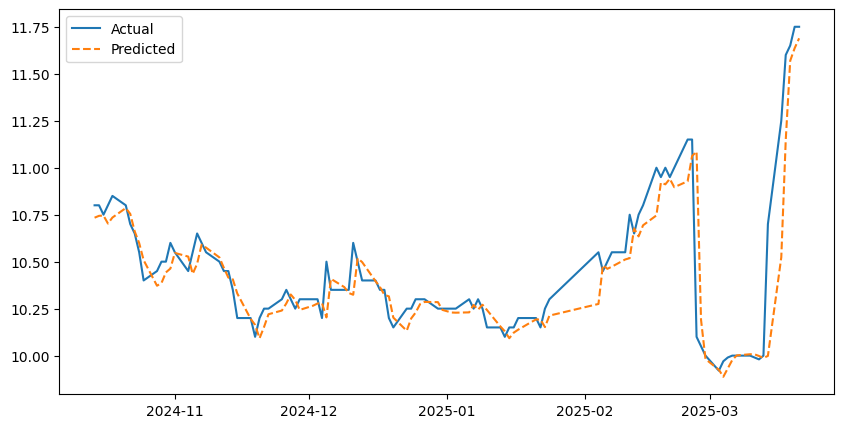

Predict next 7 days:
2025-03-22: 11.6609
2025-03-23: 11.5680
2025-03-24: 11.4700
2025-03-25: 11.3704
2025-03-26: 11.2740
2025-03-27: 11.1814
2025-03-28: 11.0930


In [60]:
# Train model với df_shb
print("Training model for df_shb...")
df_shb_hyperparams = {'hidden_size': 128, 'num_layers': 2, 'lr': 0.0005, 'batch_size': 32, 'num_epochs': 200}
process_stock(df_shb, **df_shb_hyperparams)

{'hidden_size': 128, 'num_layers': 2, 'lr': 0.005, 'batch_size': 32, 'num_epochs': 100}<br>MAE: 0.0930, MSE: 0.0296, RMSE: 0.1721, R2 Score: 0.8290

## **Train LSTM with VHM**

Training model for df_shb...
Epoch 10/200, Loss: 0.0035
Epoch 20/200, Loss: 0.0049
Epoch 30/200, Loss: 0.0027
Epoch 40/200, Loss: 0.0028
Epoch 50/200, Loss: 0.0025
Epoch 60/200, Loss: 0.0035
Epoch 70/200, Loss: 0.0015
Epoch 80/200, Loss: 0.0026
Epoch 90/200, Loss: 0.0015
Epoch 100/200, Loss: 0.0013
Epoch 110/200, Loss: 0.0015
Epoch 120/200, Loss: 0.0017
Epoch 130/200, Loss: 0.0007
Epoch 140/200, Loss: 0.0029
Epoch 150/200, Loss: 0.0007
Epoch 160/200, Loss: 0.0003
Epoch 170/200, Loss: 0.0008
Epoch 180/200, Loss: 0.0006
Epoch 190/200, Loss: 0.0021
Epoch 200/200, Loss: 0.0013
MAE: 0.4958, MSE: 0.5512, RMSE: 0.7424, R2-Score: 0.9179


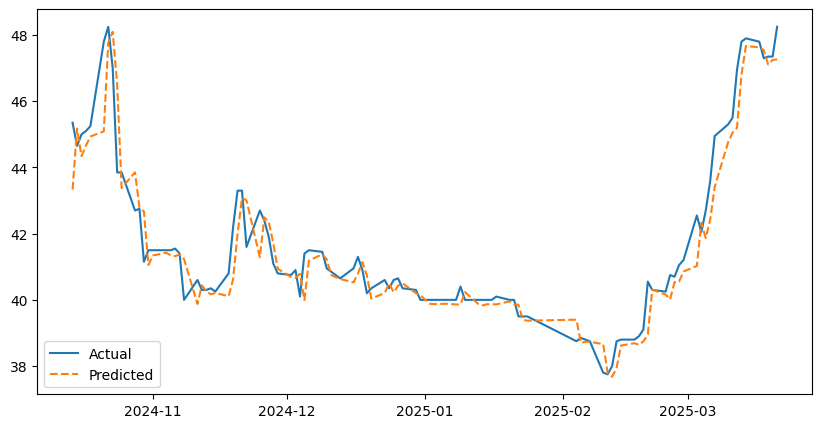

Predict next 7 days:
2025-03-22: 48.1932
2025-03-23: 48.0247
2025-03-24: 47.7788
2025-03-25: 47.5977
2025-03-26: 47.4619
2025-03-27: 47.3349
2025-03-28: 47.1977


In [61]:
print("Training model for df_shb...")
df_vhm_hyperparams = {'hidden_size': 128, 'num_layers': 2, 'lr': 0.0005, 'batch_size': 32, 'num_epochs': 200}
process_stock(df_vhm, **df_vhm_hyperparams)

## **Train LSTM with FPT**

Training model for df_fpt...
Epoch 10/100, Loss: 0.0026
Epoch 20/100, Loss: 0.0024
Epoch 30/100, Loss: 0.0017
Epoch 40/100, Loss: 0.0014
Epoch 50/100, Loss: 0.0012
Epoch 60/100, Loss: 0.0006
Epoch 70/100, Loss: 0.0012
Epoch 80/100, Loss: 0.0010
Epoch 90/100, Loss: 0.0007
Epoch 100/100, Loss: 0.0010
MAE: 1.9923, MSE: 6.9147, RMSE: 2.6296, R2-Score: 0.8571


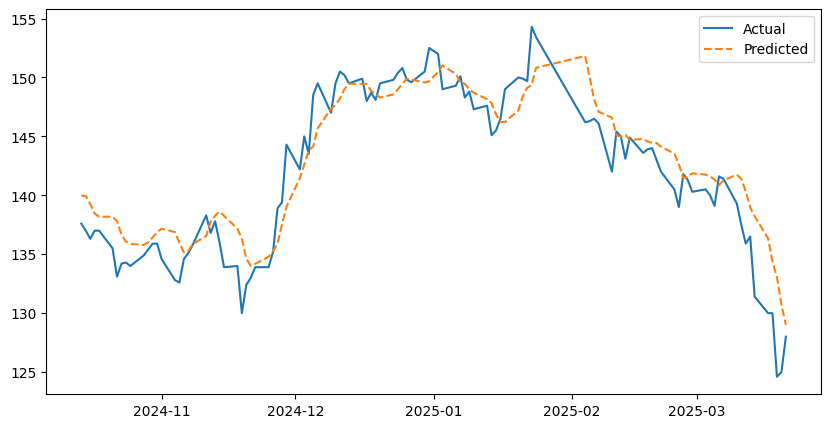

Predict next 7 days:
2025-03-22: 128.9805
2025-03-23: 129.8099
2025-03-24: 130.8216
2025-03-25: 131.8026
2025-03-26: 132.7014
2025-03-27: 133.5471
2025-03-28: 134.3392


In [62]:
print("Training model for df_fpt...")
df_fpt_hyperparams = {'hidden_size': 128, 'num_layers': 2, 'lr': 0.0005, 'batch_size': 32, 'num_epochs': 100}
process_stock(df_fpt, **df_fpt_hyperparams)

## **Train LSTM with HPG**

Training model for df_shb...
Epoch 10/200, Loss: 0.0067
Epoch 20/200, Loss: 0.0017
Epoch 30/200, Loss: 0.0051
Epoch 40/200, Loss: 0.0025
Epoch 50/200, Loss: 0.0016
Epoch 60/200, Loss: 0.0018
Epoch 70/200, Loss: 0.0028
Epoch 80/200, Loss: 0.0022
Epoch 90/200, Loss: 0.0027
Epoch 100/200, Loss: 0.0019
Epoch 110/200, Loss: 0.0006
Epoch 120/200, Loss: 0.0022
Epoch 130/200, Loss: 0.0019
Epoch 140/200, Loss: 0.0021
Epoch 150/200, Loss: 0.0006
Epoch 160/200, Loss: 0.0007
Epoch 170/200, Loss: 0.0020
Epoch 180/200, Loss: 0.0012
Epoch 190/200, Loss: 0.0009
Epoch 200/200, Loss: 0.0030
MAE: 0.2905, MSE: 0.1376, RMSE: 0.3709, R2-Score: 0.6957


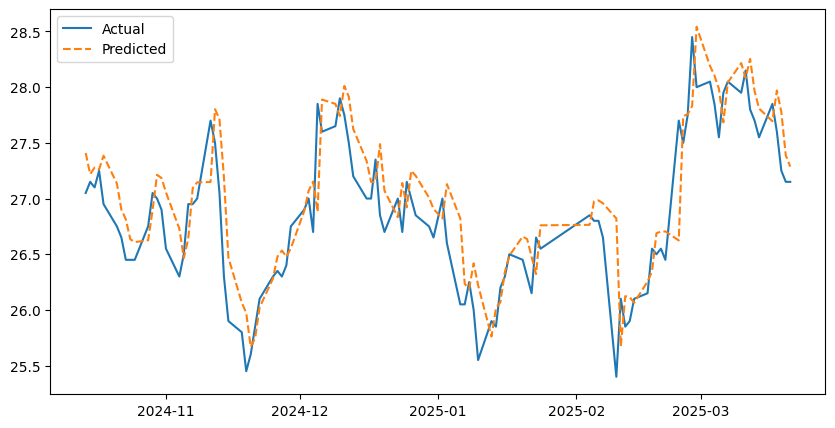

Predict next 7 days:
2025-03-22: 27.3132
2025-03-23: 27.4632
2025-03-24: 27.6171
2025-03-25: 27.7645
2025-03-26: 27.9069
2025-03-27: 28.0435
2025-03-28: 28.1725


In [63]:
print("Training model for df_shb...")
df_hpg_hyperparams = {'hidden_size': 128, 'num_layers': 2, 'lr': 0.0005, 'batch_size': 32, 'num_epochs': 200}
process_stock(df_hpg, **df_hpg_hyperparams)

## **Train LSTM with HCM**

Training model for df_shb...
Epoch 10/100, Loss: 0.0255
Epoch 20/100, Loss: 0.0071
Epoch 30/100, Loss: 0.0043
Epoch 40/100, Loss: 0.0022
Epoch 50/100, Loss: 0.0013
Epoch 60/100, Loss: 0.0036
Epoch 70/100, Loss: 0.0039
Epoch 80/100, Loss: 0.0021
Epoch 90/100, Loss: 0.0021
Epoch 100/100, Loss: 0.0008
MAE: 0.3189, MSE: 0.1821, RMSE: 0.4267, R2-Score: 0.9069


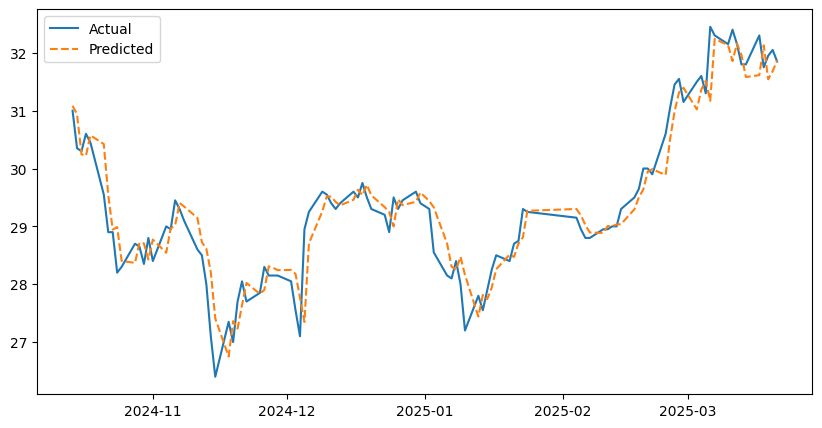

Predict next 7 days:
2025-03-22: 31.6454
2025-03-23: 31.4289
2025-03-24: 31.2599
2025-03-25: 31.1204
2025-03-26: 30.9904
2025-03-27: 30.8646
2025-03-28: 30.7472


In [64]:
print("Training model for df_shb...")
df_hcm_hyperparams = {'hidden_size': 128, 'num_layers': 2, 'lr': 0.0005, 'batch_size': 32, 'num_epochs': 100}
process_stock(df_hcm, **df_hcm_hyperparams)